In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Employee_Promotion_cleaned.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Does age, length of service or previous year rating influenced the management to promote employees?

In [10]:
Correlation = df[['age','length_of_service','previous_year_rating','is_promoted']].corr()
Correlation

,age,length_of_service,previous_year_rating,is_promoted
age,1.000000,0.657111,0.005491,-0.017166
length_of_service,0.657111,1.000000,0.000112,-0.010670
previous_year_rating,0.005491,0.000112,1.000000,0.153260
is_promoted,-0.017166,-0.010670,0.153260,1.000000


<AxesSubplot:>

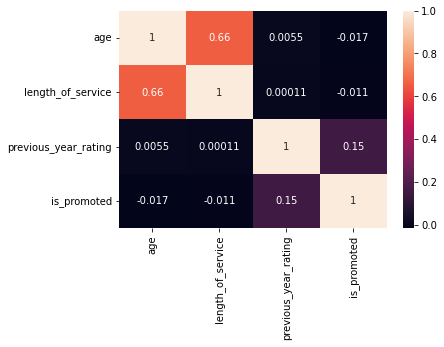

In [11]:
sns.heatmap((df[['age','length_of_service','previous_year_rating', 'is_promoted']].corr()),cmap="rocket", annot=True)

# Have promotions distributed equally among females and males?

gender
f    1467
m    3201
Name: is_promoted, dtype: int64

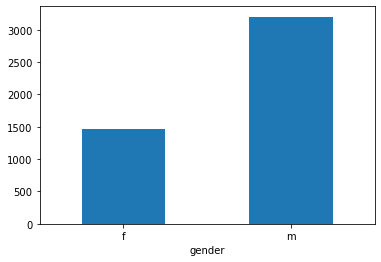

In [13]:
Gender_Distribution = df.groupby("gender")["is_promoted"].sum()
Gender_Distribution.plot.bar(x='is_promoted', y='gender', rot=0)
Gender_Distribution

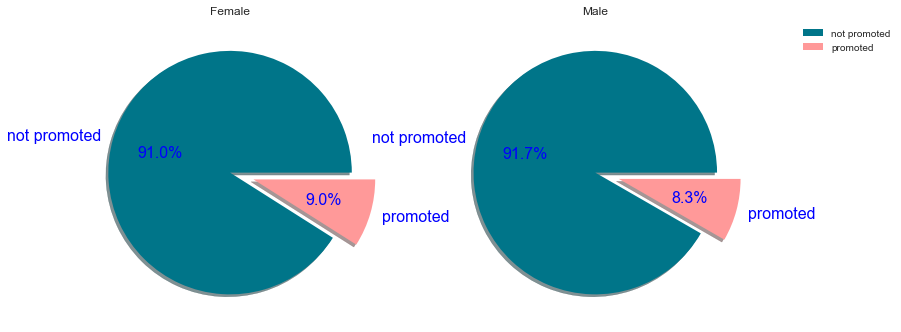

In [14]:
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=df[df.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='b',fontsize=16),
    colors=['#007589','#ff9999']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=df[df.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='b',fontsize=16),
    colors=['#007589','#ff9999']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))